# Exploring and Transforming JSON Schemas

# Introduction

In this lesson, you'll formalize how to explore a JSON file whose structure and schema is unknown to you. This often happens in practice when you are handed a file or stumble upon one with little documentation.

## Objectives
You will be able to:
* Explore unknown JSON schemas
* Access and manipulate data inside a JSON file
* Convert JSON to alternative data formats

## Loading the JSON file

Load the data from the file disease_data.json.

In [2]:
#Your code here 
import json
f = open("./disease_data.json")
data = json.load(f)
type(data)

dict

## Explore the first and second levels of the schema hierarchy

In [3]:
#Your code here
data.keys()

dict_keys(['meta', 'data'])

In [4]:
#dict_keys(['meta'])
data["meta"].keys()

dict_keys(['view'])

In [5]:
data["meta"]["view"].keys()  # This is where I can find the data elements for my coding.

dict_keys(['id', 'name', 'attribution', 'attributionLink', 'averageRating', 'category', 'createdAt', 'description', 'displayType', 'downloadCount', 'hideFromCatalog', 'hideFromDataJson', 'indexUpdatedAt', 'licenseId', 'newBackend', 'numberOfComments', 'oid', 'provenance', 'publicationAppendEnabled', 'publicationDate', 'publicationGroup', 'publicationStage', 'rowClass', 'rowsUpdatedAt', 'rowsUpdatedBy', 'tableId', 'totalTimesRated', 'viewCount', 'viewLastModified', 'viewType', 'columns', 'grants', 'license', 'metadata', 'owner', 'query', 'rights', 'tableAuthor', 'tags', 'flags'])

In [15]:
# dict_keys(['data'])
data["data"][0]
print(f"len - data[data][0]: {len(data['data'][0])}")

len - data[data][0]: 42


In [18]:
data["data"][0][0:8+1]

[1,
 'FF49C41F-CE8D-46C4-9164-653B1227CF6F',
 1,
 1527194521,
 '959778',
 1527194521,
 '959778',
 None,
 '2016']

In [10]:
type(data["data"])

list

In [11]:
len(data["data"])

60266

## Convert to a DataFrame

Create a DataFrame from the JSON file. Be sure to retrive the column names for the dataframe. (Search within the 'meta' key of the master dictionary.) The DataFrame should include all 42 columns.

In [19]:
#Your code here
import pandas as pd
df = pd.DataFrame(data["data"])
df.head()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,1,FF49C41F-CE8D-46C4-9164-653B1227CF6F,1,1527194521,959778,1527194521,959778,None,2016,2016,...,59,ALC,ALC2_2,CRDPREV,OVERALL,OVR,None,None,None,None
1,2,F4468C3D-340A-4CD2-84A3-DF554DFF065E,2,1527194521,959778,1527194521,959778,None,2016,2016,...,01,ALC,ALC2_2,CRDPREV,OVERALL,OVR,None,None,None,None
2,3,65609156-A343-4869-B03F-2BA62E96AC19,3,1527194521,959778,1527194521,959778,None,2016,2016,...,02,ALC,ALC2_2,CRDPREV,OVERALL,OVR,None,None,None,None
3,4,0DB09B00-EFEB-4AC0-9467-A7CBD2B57BF3,4,1527194521,959778,1527194521,959778,None,2016,2016,...,04,ALC,ALC2_2,CRDPREV,OVERALL,OVR,None,None,None,None
4,5,D98DA5BA-6FD6-40F5-A9B1-ABD45E44967B,5,1527194521,959778,1527194521,959778,None,2016,2016,...,05,ALC,ALC2_2,CRDPREV,OVERALL,OVR,None,None,None,None


In [21]:
df.shape

(60266, 42)

In [22]:
df.columns

RangeIndex(start=0, stop=42, step=1)

In [23]:
df.columns = [item["name"] for item in data["meta"]["view"]["columns"]]
df.columns

Index(['sid', 'id', 'position', 'created_at', 'created_meta', 'updated_at',
       'updated_meta', 'meta', 'YearStart', 'YearEnd', 'LocationAbbr',
       'LocationDesc', 'DataSource', 'Topic', 'Question', 'Response',
       'DataValueUnit', 'DataValueType', 'DataValue', 'DataValueAlt',
       'DataValueFootnoteSymbol', 'DatavalueFootnote', 'LowConfidenceLimit',
       'HighConfidenceLimit', 'StratificationCategory1', 'Stratification1',
       'StratificationCategory2', 'Stratification2', 'StratificationCategory3',
       'Stratification3', 'GeoLocation', 'ResponseID', 'LocationID', 'TopicID',
       'QuestionID', 'DataValueTypeID', 'StratificationCategoryID1',
       'StratificationID1', 'StratificationCategoryID2', 'StratificationID2',
       'StratificationCategoryID3', 'StratificationID3'],
      dtype='object')

In [24]:
df.head()

,sid,id,position,created_at,created_meta,updated_at,updated_meta,meta,YearStart,YearEnd,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
0,1,FF49C41F-CE8D-46C4-9164-653B1227CF6F,1,1527194521,959778,1527194521,959778,None,2016,2016,...,59,ALC,ALC2_2,CRDPREV,OVERALL,OVR,None,None,None,None
1,2,F4468C3D-340A-4CD2-84A3-DF554DFF065E,2,1527194521,959778,1527194521,959778,None,2016,2016,...,01,ALC,ALC2_2,CRDPREV,OVERALL,OVR,None,None,None,None
2,3,65609156-A343-4869-B03F-2BA62E96AC19,3,1527194521,959778,1527194521,959778,None,2016,2016,...,02,ALC,ALC2_2,CRDPREV,OVERALL,OVR,None,None,None,None
3,4,0DB09B00-EFEB-4AC0-9467-A7CBD2B57BF3,4,1527194521,959778,1527194521,959778,None,2016,2016,...,04,ALC,ALC2_2,CRDPREV,OVERALL,OVR,None,None,None,None
4,5,D98DA5BA-6FD6-40F5-A9B1-ABD45E44967B,5,1527194521,959778,1527194521,959778,None,2016,2016,...,05,ALC,ALC2_2,CRDPREV,OVERALL,OVR,None,None,None,None


## Level-Up
## Create a bar graph of states with the highest asthma rates for adults age 18+

In [27]:
df["Topic"].unique()

array(['Alcohol', 'Arthritis', 'Asthma', 'Cancer', 'Diabetes',
       'Mental Health', 'Chronic Obstructive Pulmonary Disease',
       'Oral Health', 'Cardiovascular Disease', 'Immunization',
       'Chronic Kidney Disease',
       'Nutrition, Physical Activity, and Weight Status', 'Older Adults',
       'Tobacco', 'Overarching Conditions', 'Reproductive Health',
       'Disability'], dtype=object)

In [31]:
df[df["Topic"] == "Asthma"].Question.unique()

array(['Current asthma prevalence among adults aged >= 18 years',
       'Asthma prevalence among women aged 18-44 years',
       'Influenza vaccination among noninstitutionalized adults aged 18-64 years with asthma',
       'Influenza vaccination among noninstitutionalized adults aged >= 65 years with asthma',
       'Pneumococcal vaccination among noninstitutionalized adults aged 18-64 years with asthma',
       'Pneumococcal vaccination among noninstitutionalized adults aged >= 65 years with asthma'],
      dtype=object)

In [26]:
df[df.Topic == 'Asthma'].Question.value_counts(normalize=True).cumsum()[:10]


,sid,id,position,created_at,created_meta,updated_at,updated_meta,meta,YearStart,YearEnd,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
4725,4726,786EA689-97C8-45C7-B733-9CF01D8AEB62,4726,1527194522,959778,1527194522,959778,None,2016,2016,...,17,AST,AST1_1,CRDPREV,GENDER,GENM,None,None,None,None
5529,5530,AC33E8A2-F507-48D5-B02C-9179EDC425E3,5530,1527194522,959778,1527194522,959778,None,2016,2016,...,18,AST,AST1_1,CRDPREV,GENDER,GENM,None,None,None,None
5632,5633,1E855D58-2A98-44E2-A062-AE1E8A2F7DB6,5633,1527194522,959778,1527194522,959778,None,2016,2016,...,19,AST,AST1_1,CRDPREV,GENDER,GENM,None,None,None,None
6777,6778,D300D76F-6293-4C41-B47F-AB8A93426EE2,6778,1527194522,959778,1527194522,959778,None,2016,2016,...,20,AST,AST1_1,CRDPREV,GENDER,GENM,None,None,None,None
7034,7035,5868F7F7-82F1-4D72-A144-767DFA87D581,7035,1527194522,959778,1527194522,959778,None,2016,2016,...,21,AST,AST1_1,CRDPREV,GENDER,GENM,None,None,None,None
7102,10245,6A49F874-7FD9-42E6-B7F0-50BA588CA63F,10245,1527194523,959778,1527194523,959778,None,2016,2016,...,27,AST,AST1_2,CRDPREV,OVERALL,OVR,None,None,None,None
7337,7337,0B99F1EA-3837-48D6-B5CD-70F6BD38AD8D,7337,1527194523,959778,1527194523,959778,None,2016,2016,...,22,AST,AST1_1,CRDPREV,GENDER,GENM,None,None,None,None
7428,7428,99E47B23-41EC-4FC6-8215-C15BDD4025B5,7428,1527194523,959778,1527194523,959778,None,2016,2016,...,23,AST,AST1_1,CRDPREV,GENDER,GENM,None,None,None,None
7499,7499,A698381D-30F8-4F11-8A2F-036B228BEBE0,7499,1527194523,959778,1527194523,959778,None,2016,2016,...,24,AST,AST1_1,CRDPREV,GENDER,GENM,None,None,None,None
7966,7966,838ED10F-2F25-45FE-8FA0-80BF7F0722FC,7966,1527194523,959778,1527194523,959778,None,2016,2016,...,50,AST,AST1_1,CRDPREV,GENDER,GENM,None,None,None,None


In [25]:
#Preview Asthma Questions in Dataset
df[df.Topic == 'Asthma'].Question.value_counts(normalize=True).cumsum()[:10]

Current asthma prevalence among adults aged >= 18 years                                    0.186096
Influenza vaccination among noninstitutionalized adults aged >= 65 years with asthma       0.372193
Pneumococcal vaccination among noninstitutionalized adults aged >= 65 years with asthma    0.558289
Influenza vaccination among noninstitutionalized adults aged 18-64 years with asthma       0.744385
Pneumococcal vaccination among noninstitutionalized adults aged 18-64 years with asthma    0.930481
Asthma prevalence among women aged 18-44 years                                             1.000000
Name: Question, dtype: float64

In [32]:
#Preview the Data
cols = ['LocationAbbr', 'LocationDesc', 'DataSource','Topic', 'Question', 'YearStart', 'YearEnd', 'DataValue']
view = df[df.Question == 'Current asthma prevalence among adults aged >= 18 years'][cols]
view.head()

,LocationAbbr,LocationDesc,DataSource,Topic,Question,YearStart,YearEnd,DataValue
4725,IL,Illinois,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,2016,2016,6.5
5529,IN,Indiana,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,2016,2016,6.7
5632,IA,Iowa,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,2016,2016,5.6
6777,KS,Kansas,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,2016,2016,6.1
7034,KY,Kentucky,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,2016,2016,6.9


In [33]:
# Notice Multiple Entries for Some States
view.sort_values(by='LocationAbbr').head()

,LocationAbbr,LocationDesc,DataSource,Topic,Question,YearStart,YearEnd,DataValue
9797,AK,Alaska,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,2016,2016,None
10013,AK,Alaska,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,2016,2016,10.3
9427,AK,Alaska,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,2016,2016,9
9959,AK,Alaska,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,2016,2016,None
9905,AK,Alaska,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,2016,2016,None


In [34]:
df.StratificationCategoryID1.value_counts(normalize=True)  # Provides % vs Count

RACE       0.631534
GENDER     0.231673
OVERALL    0.136794
Name: StratificationCategoryID1, dtype: float64

In [35]:
#Further subset
view = df[(df.Question == 'Current asthma prevalence among adults aged >= 18 years')
         & (df.StratificationCategoryID1 == 'OVERALL')]
view = view.sort_values(by='LocationAbbr')
print(view.shape)
view.head()

(110, 42)


,sid,id,position,created_at,created_meta,updated_at,updated_meta,meta,YearStart,YearEnd,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
9372,9370,5D6EDDA9-B241-4498-A262-ED20AB78C44C,9370,1527194523,959778,1527194523,959778,None,2016,2016,...,02,AST,AST1_1,CRDPREV,OVERALL,OVR,None,None,None,None
9427,9425,332B0889-ED65-4080-9373-D92FE918CD1D,9425,1527194523,959778,1527194523,959778,None,2016,2016,...,02,AST,AST1_1,AGEADJPREV,OVERALL,OVR,None,None,None,None
9426,9424,CD846EC4-617B-4D38-B287-88DCF9BA8751,9424,1527194523,959778,1527194523,959778,None,2016,2016,...,01,AST,AST1_1,AGEADJPREV,OVERALL,OVR,None,None,None,None
9371,9369,6BEC61D0-E04B-44BA-8170-F7D6A4C40A09,9369,1527194523,959778,1527194523,959778,None,2016,2016,...,01,AST,AST1_1,CRDPREV,OVERALL,OVR,None,None,None,None
9374,9372,68F151CE-3084-402C-B672-78A43FBDE287,9372,1527194523,959778,1527194523,959778,None,2016,2016,...,05,AST,AST1_1,CRDPREV,OVERALL,OVR,None,None,None,None


In [36]:
# Notice you still have some duplicates!
view.DataValueTypeID.value_counts()

AGEADJPREV    55
CRDPREV       55
Name: DataValueTypeID, dtype: int64

In [37]:
view = df[(df.Question == 'Current asthma prevalence among adults aged >= 18 years')
         & (df.StratificationCategoryID1 == 'OVERALL')
         & (df.DataValueTypeID == 'CRDPREV')]
view = view.sort_values(by='LocationAbbr')
print(view.shape)
view.head()

(55, 42)


,sid,id,position,created_at,created_meta,updated_at,updated_meta,meta,YearStart,YearEnd,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
9372,9370,5D6EDDA9-B241-4498-A262-ED20AB78C44C,9370,1527194523,959778,1527194523,959778,None,2016,2016,...,02,AST,AST1_1,CRDPREV,OVERALL,OVR,None,None,None,None
9371,9369,6BEC61D0-E04B-44BA-8170-F7D6A4C40A09,9369,1527194523,959778,1527194523,959778,None,2016,2016,...,01,AST,AST1_1,CRDPREV,OVERALL,OVR,None,None,None,None
9374,9372,68F151CE-3084-402C-B672-78A43FBDE287,9372,1527194523,959778,1527194523,959778,None,2016,2016,...,05,AST,AST1_1,CRDPREV,OVERALL,OVR,None,None,None,None
9373,9371,5FCE0D49-11FD-4545-B9E7-14F503123105,9371,1527194523,959778,1527194523,959778,None,2016,2016,...,04,AST,AST1_1,CRDPREV,OVERALL,OVR,None,None,None,None
9375,9373,D3F00ED2-A069-4E40-B42B-5A2528A91B6F,9373,1527194523,959778,1527194523,959778,None,2016,2016,...,06,AST,AST1_1,CRDPREV,OVERALL,OVR,None,None,None,None


In [39]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 0, 'State')

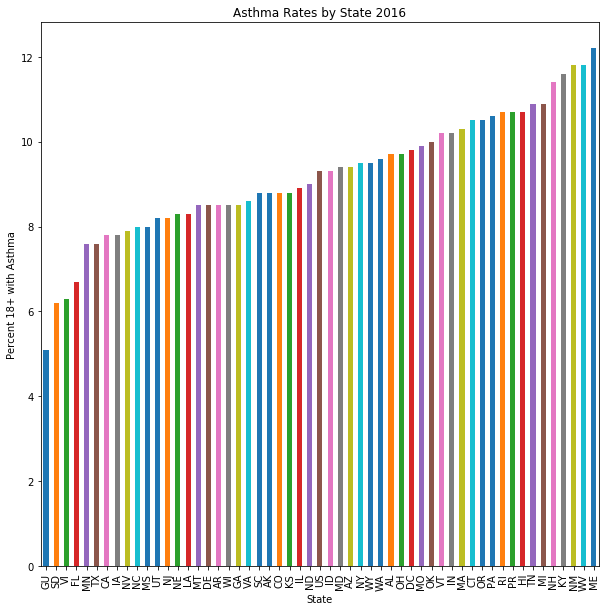

In [42]:
view.DataValue = view.DataValue.astype(float)
view = view.sort_values(by='DataValue')
view.set_index('LocationAbbr')['DataValue'].plot(kind='bar', figsize=(10,10))
plt.title('Asthma Rates by State 2016')
plt.ylabel('Percent 18+ with Asthma')
plt.xlabel('State')

## Level-Up!
## Create a function (or class) that returns an outline of the schema structure like this: 
<img src="images/outline.jpg" width="350">

Rules:
* Your outline should follow the numbering outline above (I, A, 1, a, i).
* Your outline should be properly indented! (Four spaces or one tab per indentation level.)
* Your function goes to at least a depth of 5 (Level-up: create a parameter so that the user can specify this)
* If an entry is a dictionary, list its keys as the subheadings
* After listing a key name (where applicable) include a space, a dash and the data type of the entry
* If an entry is a dict or list put in parentheses how many items are in the entry
* lists will not have key names for their entries (they're just indexed)
* For subheadings of a list, state their datatypes. 
* If a dictionary or list is more then 5 items long, only show the first 5 (we want to limit our previews); make an arbitrary order choice for dictionaries. (Level-up: Parallel to above; allow user to specify number of items to preview for large subheading collections.)

In [ ]:
# Your code here; you will probably want to define subfunctions.
def print_obj_outline(json_obj):
    return outline

In [23]:
outline = print_obj_outline(data)

In [25]:
print(outline) #Your function should produce the following output for this json object (and work for all json files!)

I. root - <class 'dict'> (2 items)
    A. meta <class 'dict'> (1 items)
        1. view <class 'dict'> (40 items)
            a. id <class 'str'> 
            b. name <class 'str'> 
            c. attribution <class 'str'> 
            d. attributionLink <class 'str'> 
            e. averageRating <class 'int'> 
    B. data <class 'list'> (60266 items)
        1. <class 'list'> (42 items)
            a. <class 'int'> 
            b. <class 'str'> 
            c. <class 'int'> 
            d. <class 'int'> 
            e. <class 'str'> 
        2. <class 'list'> (42 items)
            a. <class 'int'> 
            b. <class 'str'> 
            c. <class 'int'> 
            d. <class 'int'> 
            e. <class 'str'> 
        3. <class 'list'> (42 items)
            a. <class 'int'> 
            b. <class 'str'> 
            c. <class 'int'> 
            d. <class 'int'> 
            e. <class 'str'> 
        4. <class 'list'> (42 items)
            a. <class 'int'> 
            b. <c

## Summary

Well done! In this lab you got some extended practice exploring the structure of JSON files and writing a recursive generalized function for outlining a JSON file's schema! 